### Домашняя работа.

## Подготовка.

In [1]:
import tensorflow as tf
from tensorflow import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)
!python --version

2.12.0
Python 3.10.11


In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

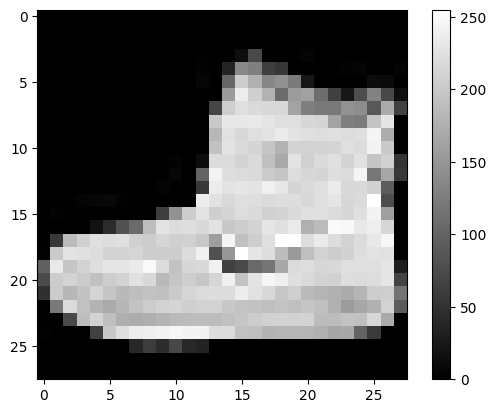

In [10]:
plt.figure()
plt.imshow(train_images[0], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

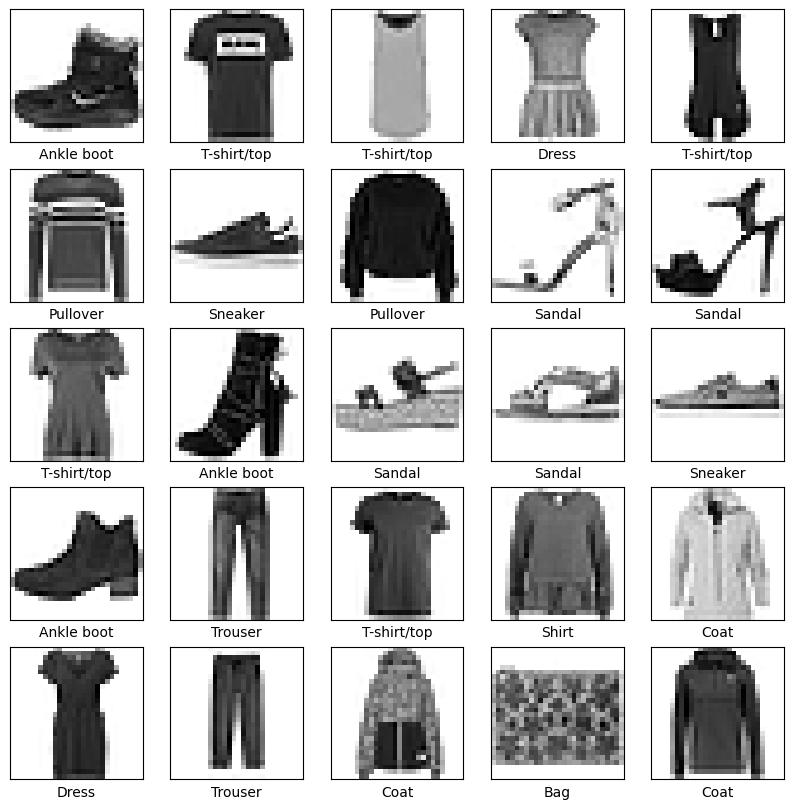

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Модель.

In [46]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='input'),
    keras.layers.Dense(128, activation='relu', name='one'),
    keras.layers.Dense(64, activation='tanh', name='two'),
    keras.layers.Dense(16, activation='tanh', name='three'),
    keras.layers.Dense(10, activation='softmax', name='output')
])

In [61]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [62]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1987 - accuracy: 0.9258
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1908 - accuracy: 0.9282
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1879 - accuracy: 0.9296
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1849 - accuracy: 0.9312
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1826 - accuracy: 0.9314
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1750 - accuracy: 0.9352
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1735 - accuracy: 0.9356
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1712 - accuracy: 0.9359
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1674 - accuracy: 0.9373
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.164

### Результат.

При добавлении нового слоя и увеличении количества эпох, удалось добиться более высокой точности и снижение показателей ошибки.

Но при всех манипуляциях модель при проверке, в одном из вариантов, выдавала ошибку. При компиляции модели были добавлены стандартные настройки, которые исправили положение, но результат в этом случае по прежнему самый низкий из всех.



In [63]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3585 - accuracy: 0.8875 - 430ms/epoch - 1ms/step

Test accuracy: 0.887499988079071


In [64]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Flatten)             (None, 784)               0         
                                                                 
 one (Dense)                 (None, 128)               100480    
                                                                 
 two (Dense)                 (None, 64)                8256      
                                                                 
 three (Dense)               (None, 16)                1040      
                                                                 
 output (Dense)              (None, 10)                170       
                                                                 
Total params: 109,946
Trainable params: 109,946
Non-trainable params: 0
_________________________________________________________________


In [65]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [66]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [67]:
predictions[0]

array([0.085338  , 0.08533859, 0.08533786, 0.08533859, 0.08533873,
       0.08533952, 0.0853379 , 0.08534104, 0.08533812, 0.2319516 ],
      dtype=float32)

In [74]:
np.argmax(predictions[12])

7

In [75]:
test_labels[12]

7

In [70]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

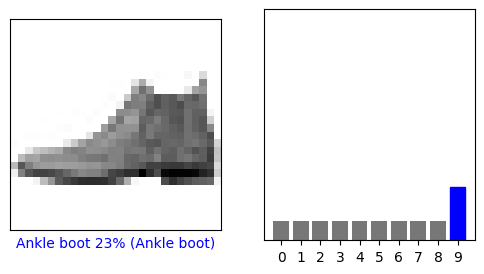

In [71]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

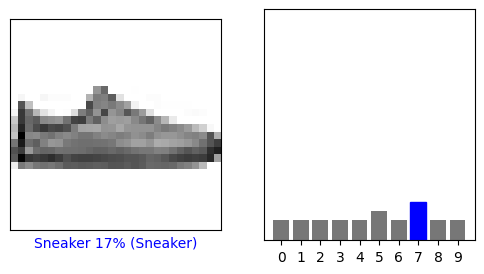

In [72]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

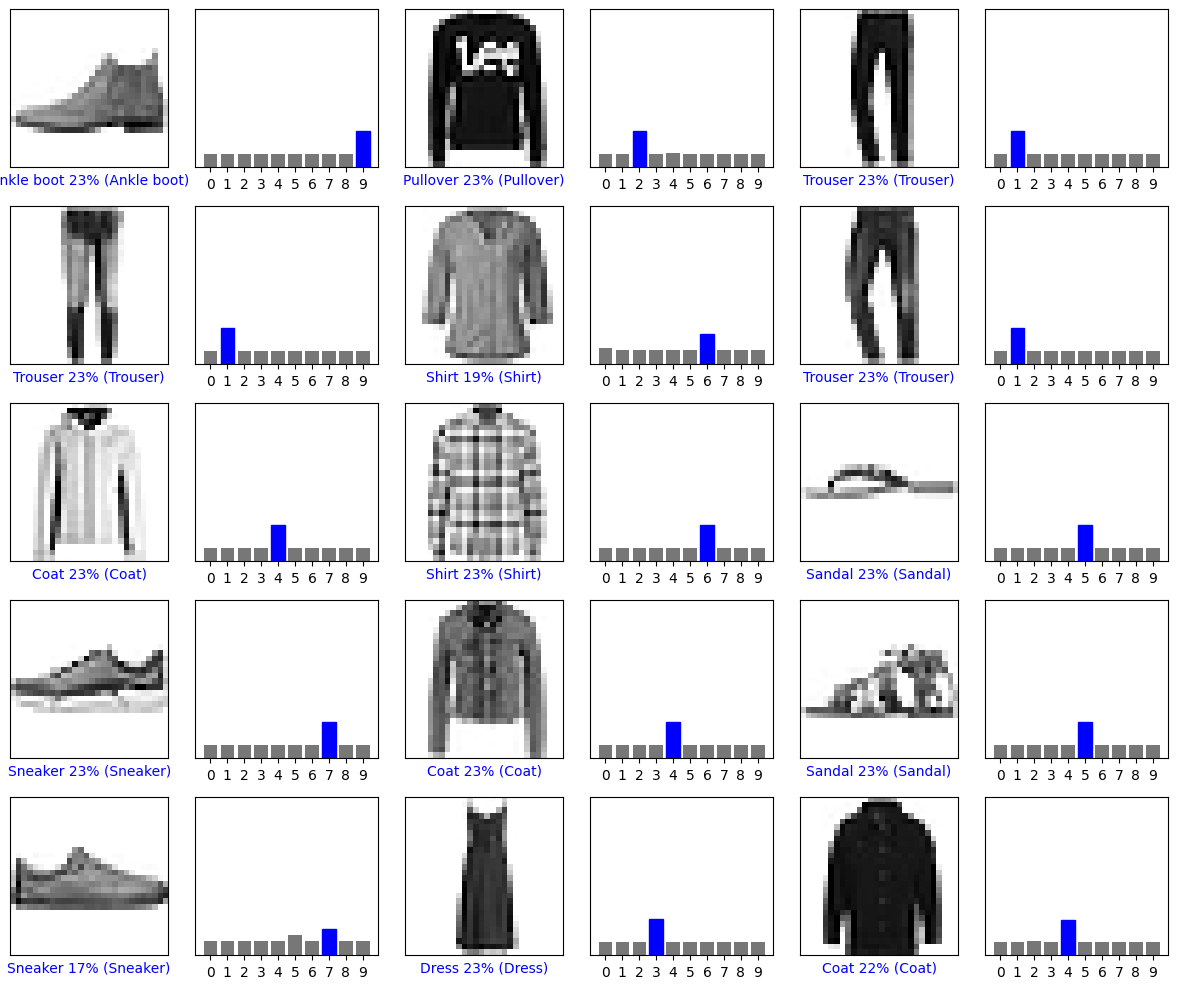

In [73]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [76]:
img = test_images[1]

print(img.shape)

(28, 28)


In [77]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [78]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 20ms/step
[[0.08573075 0.08569706 0.22618927 0.08570085 0.08783969 0.08569577
  0.08605158 0.0857012  0.0856958  0.08569805]]


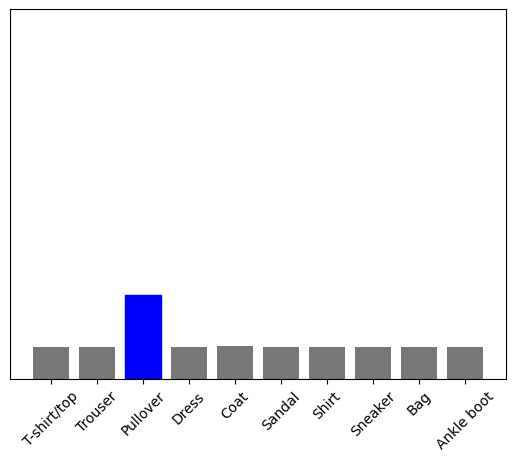

In [79]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)